Preprocessing

# Preprocessing

## Import of basic packages

In [1]:
import pandas as pd
from sklearn import preprocessing
from imblearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from librosa import display
from datetime import datetime

## Load Data
Loading FMA Data Set first, keeping header and multi level index

In [2]:
sound_features = pd.read_csv('C:/Data/fma_metadata/features.csv',sep=',', header=[0, 1, 2], index_col = 0)
sound_features.index = sound_features.index.map(np.int)

Loading Spotify popularities obtained from <b>Spotify Popularity.ipynb</b>

In [3]:
popularities = pd.read_csv("C:/Data/tracksinspotify.csv")
popularities = popularities.set_index("track_id")
popularities = popularities.drop(columns=["spotify_id", "Unnamed: 0"])

## Data Quality
Add popularities to dataset and drop duplicates and NAs

In [4]:
#Join Lables to sound features and drop songs without spotify match

sound_features_columns = sound_features.columns
sound_features = sound_features.join(popularities)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [5]:
#Delete rows with null values e.g. no matches from Spotify

sound_features = sound_features.dropna()

In [6]:
#Delete duplicate rows

sound_features = sound_features.drop_duplicates()

In [7]:
#Clean data sets

popularities = sound_features["popularity"]
sound_features = sound_features.drop(columns=["popularity"])
sound_features.columns = sound_features_columns

## Peak into datasets

In [8]:
#Have a look

sound_features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
141           0.172898 -0.284804 -1.169662 -1.062855 -0.706868 -0.708281   
149          -0.386733 -0.545598 -0.638649 -0.669786 -0.522530 -0.809405   
150          -0.083043  0.142131 -0.466703  1.447829 -0.324532  0.098253   
153           2.437779  0.886211  2.899974  1.726185  1.248919  0.676350   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
141        -0.204884  0.023624 -0.642770 -0.786291  ...  0.145994  0.024342   
149        -0.814669 -0.304319 -0.238370 -0.208790  ...  0.072945  0.031259   
150        -0.560927 -0.524895 -0.277307 -0.467008  ...  0.091688  0.024105   
153         0.174806  0.327476  0.356982  0.497109  ...  0.063820  0.016608   

feature                      zcr                                          \
statistics              kurtosis       max      mean    median       min   
number            06          01        01        01        01        01   
track_id                                                                   
10          0.013921   21.434212  0.452148  0.077515  0.071777  0.000000   
141         0.032111   32.994659  0.415527  0.040267  0.034668  0.002930   
149         0.030753   19.319490  0.559082  0.045064  0.028320  0.000000   
150         0.021738   10.283248  0.520996  0.038384  0.019531  0.001465   
153         0.015160  179.469254  0.852051  0.061346  0.059082  0.000000   

feature                          
statistics       skew       std  
number             01        01  
track_id                         
10           3.542325  0.040800  
141          4.204097  0.028665  
149          4.167562  0.060894  
150          3.125291  0.056584  
153         12.755673  0.052093  

[5 rows x 518 columns]

In [9]:
popularities.head()

track_id
10     32.0
141     1.0
149     0.0
150     0.0
153     0.0
Name: popularity, dtype: float64

In [10]:
#some advanced indexing
#print(sound_features.columns)
#idx = pd.IndexSlice
#sound_features.loc[:,idx[:,("mean","std")]]

## Create target binary popularities 
Using 75% Quartile of popularities above 0

In [11]:
#Label Binarization with 75% Quartile of label histogram wihtout considering zeros

popularities[popularities > 0].describe()
popularities_binary = popularities > 11

count    8777.000000
mean        8.399909
std         9.518324
min         1.000000
25%         2.000000
50%         5.000000
75%        11.000000
max        70.000000
Name: popularity, dtype: float64

## Feature standardization
Using sklearn.preprocessing.scale

In [12]:
#feature standardization

sound_features_scaled = pd.DataFrame(preprocessing.scale(sound_features))
sound_features_scaled.index = sound_features.index
sound_features_scaled.columns = sound_features.columns

sound_features_scaled.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
10            0.098270 -0.142754  0.247059 -0.179897  0.335924  0.164760   
141          -0.007384 -0.139845 -0.185768 -0.793912 -0.212114 -0.172588   
149          -0.024137 -0.258592 -0.117494 -0.502569 -0.163410 -0.192576   
150          -0.015046  0.054553 -0.095387  1.067011 -0.111096 -0.013167   
153           0.060417  0.393356  0.337475  1.273329  0.304629  0.101100   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
10          0.099122  0.051158  0.144499  0.382049  ... -0.840756 -0.688949   
141        -0.022981 -0.010096 -0.172766 -0.191981  ...  1.082060  0.394147   
149        -0.060669 -0.022802 -0.062540 -0.072248  ... -0.878681  1.566411   
150        -0.044986 -0.031348 -0.073152 -0.125784  ... -0.375602  0.353985   
153         0.000486  0.001677  0.099734  0.074107  ... -1.123614 -0.916785   

feature                    zcr                                          \
statistics            kurtosis       max      mean    median       min   
number            06        01        01        01        01        01   
track_id                                                                 
10         -1.397420 -0.148531  0.332249  1.121906  1.301452 -0.637579   
141         1.641962  0.014993  0.139812 -0.363023 -0.274394  0.105054   
149         1.414967 -0.178444  0.894167 -0.171801 -0.543946 -0.637579   
150        -0.091373 -0.306264  0.694032 -0.438080 -0.917173 -0.266262   
153        -1.190456  2.086903  2.433665  0.477320  0.762347 -0.637579   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
10          0.006404  0.101855  
141         0.223771 -0.393111  
149         0.211771  0.921404  
150        -0.130576  0.745634  
153         3.032647  0.562425  

[5 rows x 518 columns]

## Splitting data
80/20 Training and Validation Data

In [13]:
#Validation set split
from sklearn.model_selection import train_test_split

data_train, data_validation, target_train, target_validation = train_test_split(sound_features_scaled, popularities_binary, test_size=0.2, random_state=420)


## Dimensionality Reduction
Recursive feature elimination with cross-validation on the training data set.
Not in use, did not deliver a result with step size 3 after running for more than 2 days on whole dataset with 518 attributes.

In [15]:
#import matplotlib.pyplot as plt
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.model_selection import StratifiedKFold
#from sklearn.feature_selection import RFECV
#from sklearn.datasets import make_classification
#from imblearn.under_sampling import RandomUnderSampler


#rus = RandomUnderSampler(random_state=420,sampling_strategy = 1)
#data_train_balanced, target_train_balanced = rus.fit_resample(data_train,target_train)
    

#classifier = GradientBoostingClassifier(n_estimators = 50, max_depth = 5, learning_rate = 0.1)
#evtl step auf 3 setzen um performance zu verbessern
#rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(4),
#              scoring='f1')
#rfecv.fit(data_train_balanced, target_train_balanced)

#print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
#plt.figure()
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#plt.show()

#data_train = pd.DataFrame(rfecv.transform(data_train), columns =data_train.columns[rfecv.support_], index = data_train.index)
#data_validation = pd.DataFrame(rfecv.transform(data_validation), columns =data_validation.columns[rfecv.support_], index = data_validation.index)

## Dimensionality Reduction
Tried it with different parameters but did not improve results.

In [16]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 7, random_state=42)
#pca.fit(data_train)
#data_train = pd.DataFrame(pca.transform(X=data_train))
#data_test = pd.DataFrame(pca.transform(X=data_test))

'\nDIMENSIONALITY REDUCTION\n'

## 5-Fold sampling and balancing
Splitting the Training set in 5 subsets.
Each set also has an undersampled subset for training with balanced data.

In [14]:
#Stratified 5-fold sampling and balancing

from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

train_indices = []
train_indices_balanced = []
test_indices = []
skf = StratifiedKFold(n_splits = 4, random_state = 420, shuffle = True)
rus = RandomUnderSampler(random_state=420,sampling_strategy = 1)

for train_index, test_index in skf.split(data_train, target_train):
    #convert index to track_id
    train_index = data_train.index[train_index]
    test_index = data_train.index[test_index]
    
    #Balancing training set
    data_train_balanced, target_train_balanced = rus.fit_resample(data_train.loc[train_index], target_train.loc[train_index])
    
    #Creating lists for cv
    train_indices.append(train_index)
    test_indices.append(test_index)
    train_indices_balanced.append(train_index[rus.sample_indices_])

print("Total data set size\t"+str(len(sound_features_scaled))+' (relative amount popular songs: '+str(round(popularities_binary.value_counts()[1]/len(popularities_binary)*100,2))+'%)')
print("Training set size\t"+str(len(data_train))+' ('+str(round(target_train.value_counts()[1]/len(target_train)*100,2))+'%)')
print("Validation set size\t"+str(len(data_validation))+' ('+str(round(target_validation.value_counts()[1]/len(target_validation)*100,2))+'%)\r\n')

print("Cross-Validation splits:\r\ncv\ttrain\t\t\tbalanced\t\ttest")
for cv in range(0,4):
    print(str(cv)+'\t'+str(len(train_indices[cv])) +' ('+str(round(target_train.loc[train_indices[cv]].value_counts()[1]/len(train_indices[cv])*100,2))+'%)'
                  '\t\t'+str(len(train_indices_balanced[cv]))+' ('+str(round(target_train.loc[train_indices_balanced[cv]].value_counts()[1]/len(train_indices_balanced[cv])*100))+'%)'
                  '\t\t'+str(len(test_indices[cv]))+' ('+str(round(target_train.loc[test_indices[cv]].value_counts()[1]/len(test_indices[cv])*100,2))+'%)'
)

Total data set size	22608 (relative amount popular songs: 9.65%)
Training set size	18086 (9.76%)
Validation set size	4522 (9.22%)

Cross-Validation splits:
cv	train			balanced		test
0	13563 (9.75%)		2646 (50.0%)		4523 (9.77%)
1	13565 (9.76%)		2648 (50.0%)		4521 (9.75%)
2	13565 (9.76%)		2648 (50.0%)		4521 (9.75%)
3	13565 (9.76%)		2648 (50.0%)		4521 (9.75%)


## Drop Columns
Tried dropping some columns manually but did not increase scores.

In [17]:
#data_train = data_train.loc[:,"chroma_stft":"chroma_stft.83"]
#data_test = data_test.loc[:,"chroma_stft":"chroma_stft.83"]
#data_train.head()


'\nDROP COLUMNS\n'

# Machine Learning
## Building framework to run parameters
### Performance
Calculating performance scores for predictions

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

def performance(target_test, predictions):
    
    conf_matrix = confusion_matrix(target_test,predictions)
    
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate the recall
    conf_recall = (TP / float(TP + FN))    

    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TP / float(TN + FP))    

    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_recall) / (conf_precision + conf_recall)) 

    return conf_accuracy, conf_recall, conf_specificity, conf_precision, conf_f1

### Run_Classifier
Function to run classifiers with cross validation and store performance scores for a specific coefficient value and on balanced and unbalanced data.

In [19]:
#Create perfomance Dataframes
cv_perf = pd.DataFrame(columns = ['accuracy', 'recall', 'specificity', 'precision', 'f1 score']
                  , index = pd.MultiIndex.from_arrays([[],[],[],[]], names =['classifier_name', 'coeff_value','balanced', 'cv']))
roc_perf = pd.DataFrame(columns = ['tpr', 'auc']
                  , index = pd.MultiIndex.from_arrays([[],[],[],[]], names =['classifier_name', 'coeff_value','balanced', 'cv']))
roc_mean_perf = pd.DataFrame(columns = ['tpr', 'auc', "auc_std"]
                  , index = pd.MultiIndex.from_arrays([[],[],[]], names =['classifier_name', 'coeff_value','balanced']))



#Assign fpr value for tpr interpolation in ROC calculation
mean_fpr = np.linspace(0, 1, 100) # = [0.0, 0.01, 0.02, 0.03, ... , 0.99, 1.0]

#Slicing pandas multiindex for perfomance Dataframes
idx = pd.IndexSlice

#Define function that runs crossvalidation for balanced and inbalanced data
def run_classifier(classifier, classifier_name, coeff_value):
    
    #cross-validation
    for cv in range(0,4):
        
        #Testing balanced and unbalanced
        for balanced in (True, False):
            print("starting to run cv " + str(cv) + ", balanced=" + str(balanced) + " at " + str(datetime.now(tz=None)))
            
            if(balanced):
                classifier.fit(data_train.loc[train_indices_balanced[cv]], target_train.loc[train_indices_balanced[cv]])
            else:
                classifier.fit(data_train.loc[train_indices[cv]], target_train.loc[train_indices[cv]])
            
            #performance
            predictions = classifier.predict(data_train.loc[test_indices[cv]])
            acc, sens, spec, prec, f1 = performance(target_train.loc[test_indices[cv]], predictions)
            cv_perf.loc[classifier_name, coeff_value if coeff_value else 'None',balanced, cv] = {'accuracy': acc, 'recall': sens,'specificity': spec, 'precision': prec, 'f1 score': f1}
            
            #ROC
            predictions_probas = classifier.predict_proba(data_train.loc[test_indices[cv]])
            fpr, tpr, thresholds = roc_curve(target_train.loc[test_indices[cv]], predictions_probas[:,1])
            tprs = np.interp(mean_fpr, fpr, tpr)
            tprs[0] = 0.0 
            roc_perf.loc[classifier_name, coeff_value if coeff_value else 'None',balanced, cv] = {'tpr':tprs , 'auc': auc(fpr, tpr)}
            
            print("finished to run cv " + str(cv) + ", balanced=" + str(balanced) + " at " + str(datetime.now(tz=None)))

### Plot_ROC
Function to plot ROC for a classifier based on stored performance scores

In [20]:
#function to plot crossvalidated ROC
def plot_roc(classifier_name, coeff_range):
    for balanced in (True,False):
        if(balanced):
            plt.title('ROC(cv mean) - balanced data - '+classifier_name)
        else:
            plt.title('ROC(cv mean) - unbalanced data - '+classifier_name)
        for c in coeff_range:
            mean_tpr = roc_perf.loc[idx[classifier_name,c if c else 'None',balanced,:],"tpr"].values.mean()
            mean_tpr[-1] = 1.0 # set the last tpr to 1
            mean_auc = auc(mean_fpr, mean_tpr)
            std_auc = roc_perf.loc[idx[classifier_name,c if c else 'None',balanced,:],"auc"].values.std()
            
            roc_mean_perf.loc[classifier_name, c if c else 'None',balanced] = {'tpr':mean_tpr , 'auc': mean_auc, 'auc_std': std_auc}
            plt.plot(mean_fpr, mean_tpr, label = '(coeff = '+str(c)+') AUC = '+str(round(mean_auc,4))+' (+/- '+str(round(std_auc,4))+')')
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

## Running classifiers
### KneighborsClassifier
Testing for n_neighors 3, 8 and 2

In [21]:
from sklearn.neighbors import KNeighborsClassifier

#variables for KNN
classifier_name = 'KNeighborsClassifier'
try:
    roc_perf.drop([classifier_name], inplace=True)
except:
    pass
coeff_range = range(3,8,2)
#Testing different n_neighbors
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = KNeighborsClassifier(n_neighbors=c, n_jobs = 2)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=3 at 2019-11-24 22:06:35.302467
starting to run cv 0, balanced=True at 2019-11-24 22:06:35.302467
finished to run cv 0, balanced=True at 2019-11-24 22:06:45.566649
starting to run cv 0, balanced=False at 2019-11-24 22:06:45.567646
finished to run cv 0, balanced=False at 2019-11-24 22:07:59.128041
starting to run cv 1, balanced=True at 2019-11-24 22:07:59.129038
finished to run cv 1, balanced=True at 2019-11-24 22:08:12.296510
starting to run cv 1, balanced=False at 2019-11-24 22:08:12.296510
finished to run cv 1, balanced=False at 2019-11-24 22:09:18.321711
starting to run cv 2, balanced=True at 2019-11-24 22:09:18.322708
finished to run cv 2, balanced=True at 2019-11-24 22:09:29.347241
starting to run cv 2, balanced=False at 2019-11-24 22:09:29.347241
finished to run cv 2, balanced=False at 2019-11-24 22:10:34.320917
starting to run cv 3, balanced=True at 2019-11-24 22:10:34.321915
finished to run cv 3, balanced=True at 2019-11-24 22:10:46.315839
starting to run cv 3

Evaluating Performance of KNeighborsClassifier

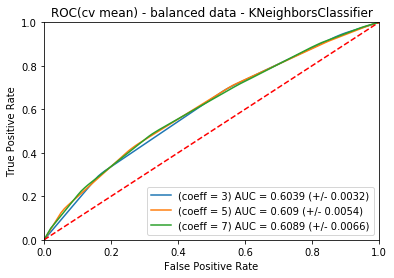

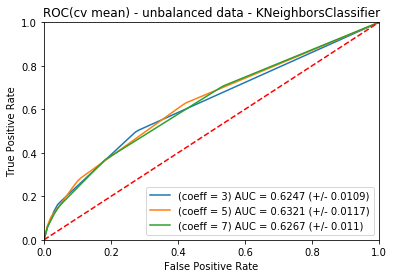

KNeighborsClassifier - Perfomance


accuracy  specificity  f1 score       auc   auc_std
coeff_value balanced                                                     
3           False     0.884828     0.963544  0.030631  0.624740  0.010875
            True      0.477775     0.454263  0.135685  0.603905  0.003228
5           False     0.896882     0.983580  0.018578  0.632116  0.011671
            True      0.457318     0.429265  0.139887  0.608969  0.005430
7           False     0.900199     0.991974  0.010063  0.626719  0.011033
            True      0.439625     0.409045  0.140993  0.608888  0.006550

In [22]:
plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_mean_perf = cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()
cv_mean  = cv_mean_perf.join(roc_mean_perf.loc[classifier_name][["auc","auc_std"]])
cv_mean.drop(columns = ['precision', 'recall'])

### DecisionTreeClassifier
Testing for max depth None, 10 and 5

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier_name = 'DecisionTreeClassifier'
coeff_range = (None, 10 , 5)

#Testing max tree sizes
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = DecisionTreeClassifier(max_depth = c, random_state = 420)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=None at 2019-11-24 22:22:21.965360
starting to run cv 0, balanced=True at 2019-11-24 22:22:21.977330
finished to run cv 0, balanced=True at 2019-11-24 22:22:23.183159
starting to run cv 0, balanced=False at 2019-11-24 22:22:23.184156
finished to run cv 0, balanced=False at 2019-11-24 22:22:36.785604
starting to run cv 1, balanced=True at 2019-11-24 22:22:36.785604
finished to run cv 1, balanced=True at 2019-11-24 22:22:37.800908
starting to run cv 1, balanced=False at 2019-11-24 22:22:37.800908
finished to run cv 1, balanced=False at 2019-11-24 22:22:49.010333
starting to run cv 2, balanced=True at 2019-11-24 22:22:49.011331
finished to run cv 2, balanced=True at 2019-11-24 22:22:50.119893
starting to run cv 2, balanced=False at 2019-11-24 22:22:50.119893
finished to run cv 2, balanced=False at 2019-11-24 22:23:03.248877
starting to run cv 3, balanced=True at 2019-11-24 22:23:03.249875
finished to run cv 3, balanced=True at 2019-11-24 22:23:04.350457
starting to run c

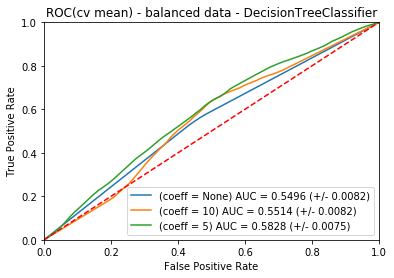

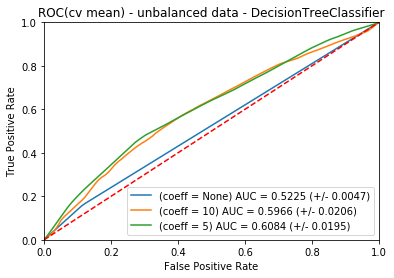

DecisionTreeClassifier - Perfomance


accuracy  specificity  f1 score       auc   auc_std
coeff_value balanced                                                     
5           False     0.899480     0.995956  0.001438  0.608362  0.019499
            True      0.498063     0.481709  0.126729  0.582809  0.007460
10          False     0.879133     0.969855  0.007851  0.596629  0.020627
            True      0.531462     0.523130  0.118766  0.551409  0.008224
None        False     0.813945     0.884627  0.031295  0.522481  0.004678
            True      0.543737     0.542309  0.108702  0.549612  0.008163

In [24]:
plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_mean_perf = cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()
cv_mean  = cv_mean_perf.join(roc_mean_perf.loc[classifier_name][["auc","auc_std"]])
cv_mean.drop(columns = ['precision', 'recall'])

In [25]:
classifier_name = 'DecisionTreeClassifier'
c = None
balanced = True
cv_perf.loc[classifier_name]
mean_tpr = roc_perf.loc[idx[classifier_name,c if c else 'None',balanced,:],"tpr"].values.mean()
mean_tpr[-1] = 1.0 # set the last tpr to 1
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = roc_perf.loc[idx[classifier_name,c if c else 'None',balanced,:],"auc"].values.std()
#roc_mean_perf.loc[classifier_name, c if c else 'None',balanced] = 
print({'tpr':mean_tpr , 'auc': mean_auc, 'auc_std': std_auc})
#plt.plot(mean_fpr, mean_tpr, label = '(coeff = '+str(c)+') AUC = '+str(round(mean_auc,4))+' (+/- '+str(round(std_auc,4))+')')

print(mean_tpr)
print(mean_auc)
print(std_auc)

{'tpr': array([0.        , 0.01230282, 0.02460565, 0.03690847, 0.0492113 ,
       0.06151412, 0.07381695, 0.08611977, 0.0984226 , 0.11072542,
       0.12302825, 0.13533107, 0.14763389, 0.15993672, 0.17223954,
       0.18454237, 0.19684519, 0.20914802, 0.22145084, 0.23375367,
       0.24605649, 0.25835932, 0.27066214, 0.28296496, 0.29526779,
       0.30757061, 0.31987344, 0.33217626, 0.34447909, 0.35678191,
       0.36908474, 0.38138756, 0.39369039, 0.40599321, 0.41829603,
       0.43059886, 0.44290168, 0.45520451, 0.46750733, 0.47981016,
       0.49211298, 0.50441581, 0.51671863, 0.52864544, 0.5396698 ,
       0.55028092, 0.56043394, 0.57013333, 0.57896157, 0.58721722,
       0.59547288, 0.60372853, 0.61198419, 0.62023985, 0.6284955 ,
       0.63675116, 0.64500681, 0.65326247, 0.66151812, 0.66977378,
       0.67802943, 0.68628509, 0.69454075, 0.7027964 , 0.71105206,
       0.71930771, 0.72756337, 0.73581902, 0.74407468, 0.75233033,
       0.76058599, 0.76884165, 0.7770973 , 0.78535296,

### RandomForestClassifier
Testing for n_estimators 10, 50 and 100 <br>
Throwing warnings because F1 calculation fails with divide by zero

In [26]:
from sklearn.ensemble import RandomForestClassifier

classifier_name = 'RandomForestClassifier'
coeff_range = (10, 50, 100)

#Testing max forest sizes
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = RandomForestClassifier(n_estimators = c, max_depth = 5, random_state = 420)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=10 at 2019-11-24 22:23:52.550254
starting to run cv 0, balanced=True at 2019-11-24 22:23:52.550254
finished to run cv 0, balanced=True at 2019-11-24 22:23:52.760694
starting to run cv 0, balanced=False at 2019-11-24 22:23:52.760694


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 0, balanced=False at 2019-11-24 22:23:53.608447
starting to run cv 1, balanced=True at 2019-11-24 22:23:53.608447
finished to run cv 1, balanced=True at 2019-11-24 22:23:53.817893
starting to run cv 1, balanced=False at 2019-11-24 22:23:53.817893


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 1, balanced=False at 2019-11-24 22:23:54.719512
starting to run cv 2, balanced=True at 2019-11-24 22:23:54.719512
finished to run cv 2, balanced=True at 2019-11-24 22:23:54.936932
starting to run cv 2, balanced=False at 2019-11-24 22:23:54.937930


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 2, balanced=False at 2019-11-24 22:23:55.772723
starting to run cv 3, balanced=True at 2019-11-24 22:23:55.773720
finished to run cv 3, balanced=True at 2019-11-24 22:23:55.984175
starting to run cv 3, balanced=False at 2019-11-24 22:23:55.985172


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 3, balanced=False at 2019-11-24 22:23:56.824946
finished to run c=10 at 2019-11-24 22:23:56.824946
starting to run c=50 at 2019-11-24 22:23:56.824946
starting to run cv 0, balanced=True at 2019-11-24 22:23:56.824946
finished to run cv 0, balanced=True at 2019-11-24 22:23:57.563483
starting to run cv 0, balanced=False at 2019-11-24 22:23:57.563483


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 0, balanced=False at 2019-11-24 22:24:01.366887
starting to run cv 1, balanced=True at 2019-11-24 22:24:01.366887
finished to run cv 1, balanced=True at 2019-11-24 22:24:02.132863
starting to run cv 1, balanced=False at 2019-11-24 22:24:02.133860


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 1, balanced=False at 2019-11-24 22:24:05.952260
starting to run cv 2, balanced=True at 2019-11-24 22:24:05.953258
finished to run cv 2, balanced=True at 2019-11-24 22:24:06.697275
starting to run cv 2, balanced=False at 2019-11-24 22:24:06.697275


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 2, balanced=False at 2019-11-24 22:24:10.403479
starting to run cv 3, balanced=True at 2019-11-24 22:24:10.403479
finished to run cv 3, balanced=True at 2019-11-24 22:24:11.136550
starting to run cv 3, balanced=False at 2019-11-24 22:24:11.136550


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 3, balanced=False at 2019-11-24 22:24:14.800829
finished to run c=50 at 2019-11-24 22:24:14.801827
starting to run c=100 at 2019-11-24 22:24:14.801827
starting to run cv 0, balanced=True at 2019-11-24 22:24:14.801827
finished to run cv 0, balanced=True at 2019-11-24 22:24:16.163209
starting to run cv 0, balanced=False at 2019-11-24 22:24:16.163209


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 0, balanced=False at 2019-11-24 22:24:23.188370
starting to run cv 1, balanced=True at 2019-11-24 22:24:23.188370
finished to run cv 1, balanced=True at 2019-11-24 22:24:24.530802
starting to run cv 1, balanced=False at 2019-11-24 22:24:24.531800


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 1, balanced=False at 2019-11-24 22:24:32.046419
starting to run cv 2, balanced=True at 2019-11-24 22:24:32.047416
finished to run cv 2, balanced=True at 2019-11-24 22:24:33.457708
starting to run cv 2, balanced=False at 2019-11-24 22:24:33.457708


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 2, balanced=False at 2019-11-24 22:24:41.205205
starting to run cv 3, balanced=True at 2019-11-24 22:24:41.206201
finished to run cv 3, balanced=True at 2019-11-24 22:24:42.636964
starting to run cv 3, balanced=False at 2019-11-24 22:24:42.637961
finished to run cv 3, balanced=False at 2019-11-24 22:24:50.001957
finished to run c=100 at 2019-11-24 22:24:50.001957


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


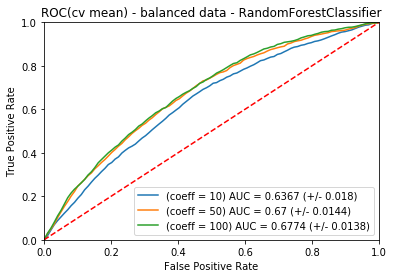

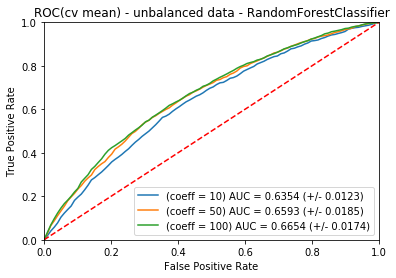

RandomForestClassifier - Perfomance


accuracy  specificity  f1 score       auc   auc_std
coeff_value balanced                                                     
10          False     0.902355     0.999939       NaN  0.635382  0.012324
            True      0.573150     0.565100  0.126396  0.636693  0.017997
50          False     0.902411     1.000000       NaN  0.659272  0.018484
            True      0.590072     0.581829  0.130045  0.670012  0.014374
100         False     0.902411     1.000000       NaN  0.665435  0.017377
            True      0.594053     0.585934  0.130598  0.677429  0.013780

In [27]:
#Evaluate perfomance
plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_mean_perf = cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()
cv_mean  = cv_mean_perf.join(roc_mean_perf.loc[classifier_name][["auc","auc_std"]])
cv_mean.drop(columns = ['precision', 'recall'])

### GradientBoostingClassifier

Testing for n_estimators 10, 50 and 100

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_name = 'GradientBoostingClassifier'
coeff_range = (10, 50, 100)

#Testing max forest sizes
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = GradientBoostingClassifier(n_estimators = c, max_depth = 5, learning_rate = 0.1, random_state = 420)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=10 at 2019-11-24 22:24:50.292692
starting to run cv 0, balanced=True at 2019-11-24 22:24:50.292692
finished to run cv 0, balanced=True at 2019-11-24 22:24:52.096415
starting to run cv 0, balanced=False at 2019-11-24 22:24:52.096415


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 0, balanced=False at 2019-11-24 22:25:01.355877
starting to run cv 1, balanced=True at 2019-11-24 22:25:01.356875
finished to run cv 1, balanced=True at 2019-11-24 22:25:03.228921
starting to run cv 1, balanced=False at 2019-11-24 22:25:03.229918
finished to run cv 1, balanced=False at 2019-11-24 22:25:12.974229
starting to run cv 2, balanced=True at 2019-11-24 22:25:12.975227
finished to run cv 2, balanced=True at 2019-11-24 22:25:14.783420
starting to run cv 2, balanced=False at 2019-11-24 22:25:14.783420


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 2, balanced=False at 2019-11-24 22:25:24.017469
starting to run cv 3, balanced=True at 2019-11-24 22:25:24.017469
finished to run cv 3, balanced=True at 2019-11-24 22:25:25.839155
starting to run cv 3, balanced=False at 2019-11-24 22:25:25.839155


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 3, balanced=False at 2019-11-24 22:25:35.282165
finished to run c=10 at 2019-11-24 22:25:35.283163
starting to run c=50 at 2019-11-24 22:25:35.283163
starting to run cv 0, balanced=True at 2019-11-24 22:25:35.283163
finished to run cv 0, balanced=True at 2019-11-24 22:25:43.721311
starting to run cv 0, balanced=False at 2019-11-24 22:25:43.721311
finished to run cv 0, balanced=False at 2019-11-24 22:26:26.032786
starting to run cv 1, balanced=True at 2019-11-24 22:26:26.032786
finished to run cv 1, balanced=True at 2019-11-24 22:26:33.946795
starting to run cv 1, balanced=False at 2019-11-24 22:26:33.947793
finished to run cv 1, balanced=False at 2019-11-24 22:27:17.608610
starting to run cv 2, balanced=True at 2019-11-24 22:27:17.608610
finished to run cv 2, balanced=True at 2019-11-24 22:27:26.144021
starting to run cv 2, balanced=False at 2019-11-24 22:27:26.145020
finished to run cv 2, balanced=False at 2019-11-24 22:28:07.900036
starting to run cv 3, balanced=Tr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 0, balanced=False at 2019-11-24 22:30:38.241893
starting to run cv 1, balanced=True at 2019-11-24 22:30:38.241893
finished to run cv 1, balanced=True at 2019-11-24 22:30:54.042067
starting to run cv 1, balanced=False at 2019-11-24 22:30:54.043064
finished to run cv 1, balanced=False at 2019-11-24 22:32:13.169863
starting to run cv 2, balanced=True at 2019-11-24 22:32:13.170860
finished to run cv 2, balanced=True at 2019-11-24 22:32:30.473589
starting to run cv 2, balanced=False at 2019-11-24 22:32:30.474586
finished to run cv 2, balanced=False at 2019-11-24 22:33:49.308285
starting to run cv 3, balanced=True at 2019-11-24 22:33:49.308285
finished to run cv 3, balanced=True at 2019-11-24 22:34:04.962910
starting to run cv 3, balanced=False at 2019-11-24 22:34:04.962910
finished to run cv 3, balanced=False at 2019-11-24 22:35:23.502825
finished to run c=100 at 2019-11-24 22:35:23.502825


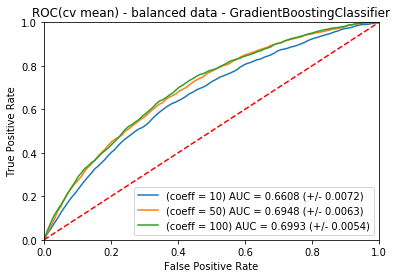

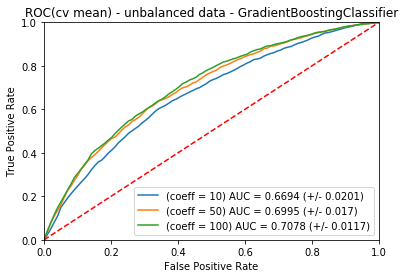

GradientBoostingClassifier - Perfomance


accuracy  specificity  f1 score       auc   auc_std
coeff_value balanced                                                     
10          False     0.902355     0.999877  0.000442  0.669360  0.020071
            True      0.593995     0.587770  0.127170  0.660821  0.007192
50          False     0.901913     0.999142  0.000553  0.699506  0.016998
            True      0.629160     0.626738  0.127170  0.694751  0.006258
100         False     0.901526     0.998346  0.001622  0.707781  0.011651
            True      0.637012     0.635500  0.127060  0.699261  0.005450

In [29]:
#Evaluate perfomance
plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_mean_perf = cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()
cv_mean  = cv_mean_perf.join(roc_mean_perf.loc[classifier_name][["auc","auc_std"]])
cv_mean.drop(columns = ['precision', 'recall'])

### SVC
Testing for kernels linear, rbf and poly

In [30]:
from sklearn.svm import SVC

classifier_name = 'SVC'
coeff_range = ('linear','rbf','poly')

#Testing max forest sizes
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = SVC(kernel = c, C = 1, probability = True, gamma = 'auto', random_state = 420, cache_size=1999)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=linear at 2019-11-24 22:35:23.835954
starting to run cv 0, balanced=True at 2019-11-24 22:35:23.835954
finished to run cv 0, balanced=True at 2019-11-24 22:36:57.331784
starting to run cv 0, balanced=False at 2019-11-24 22:36:57.332782


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 0, balanced=False at 2019-11-25 02:03:29.603225
starting to run cv 1, balanced=True at 2019-11-25 02:03:29.603225
finished to run cv 1, balanced=True at 2019-11-25 02:04:58.618059
starting to run cv 1, balanced=False at 2019-11-25 02:04:58.619058


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 1, balanced=False at 2019-11-25 05:28:05.083091
starting to run cv 2, balanced=True at 2019-11-25 05:28:05.084088
finished to run cv 2, balanced=True at 2019-11-25 05:29:26.703857
starting to run cv 2, balanced=False at 2019-11-25 05:29:26.704854
finished to run cv 2, balanced=False at 2019-11-25 09:08:08.856253
starting to run cv 3, balanced=True at 2019-11-25 09:08:08.856253
finished to run cv 3, balanced=True at 2019-11-25 09:09:29.476992
starting to run cv 3, balanced=False at 2019-11-25 09:09:29.476992


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 3, balanced=False at 2019-11-25 11:58:05.621368
finished to run c=linear at 2019-11-25 11:58:05.621368
starting to run c=rbf at 2019-11-25 11:58:05.622365
starting to run cv 0, balanced=True at 2019-11-25 11:58:05.624360
finished to run cv 0, balanced=True at 2019-11-25 11:58:34.129223
starting to run cv 0, balanced=False at 2019-11-25 11:58:34.129223


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 0, balanced=False at 2019-11-25 12:04:05.990817
starting to run cv 1, balanced=True at 2019-11-25 12:04:05.990817
finished to run cv 1, balanced=True at 2019-11-25 12:04:34.288251
starting to run cv 1, balanced=False at 2019-11-25 12:04:34.288251


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 1, balanced=False at 2019-11-25 12:10:04.655109
starting to run cv 2, balanced=True at 2019-11-25 12:10:04.655109
finished to run cv 2, balanced=True at 2019-11-25 12:10:32.904466
starting to run cv 2, balanced=False at 2019-11-25 12:10:32.904466
finished to run cv 2, balanced=False at 2019-11-25 12:16:12.319060
starting to run cv 3, balanced=True at 2019-11-25 12:16:12.319060
finished to run cv 3, balanced=True at 2019-11-25 12:16:40.760022
starting to run cv 3, balanced=False at 2019-11-25 12:16:40.761019


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 3, balanced=False at 2019-11-25 12:22:12.943511
finished to run c=rbf at 2019-11-25 12:22:12.944509
starting to run c=poly at 2019-11-25 12:22:12.944509
starting to run cv 0, balanced=True at 2019-11-25 12:22:12.947501
finished to run cv 0, balanced=True at 2019-11-25 12:22:42.181623
starting to run cv 0, balanced=False at 2019-11-25 12:22:42.181623
finished to run cv 0, balanced=False at 2019-11-25 12:28:18.828314
starting to run cv 1, balanced=True at 2019-11-25 12:28:18.829312
finished to run cv 1, balanced=True at 2019-11-25 12:28:48.186157
starting to run cv 1, balanced=False at 2019-11-25 12:28:48.187148
finished to run cv 1, balanced=False at 2019-11-25 12:34:20.863824
starting to run cv 2, balanced=True at 2019-11-25 12:34:20.863824
finished to run cv 2, balanced=True at 2019-11-25 12:34:50.109296
starting to run cv 2, balanced=False at 2019-11-25 12:34:50.110293
finished to run cv 2, balanced=False at 2019-11-25 12:40:27.929185
starting to run cv 3, balanced

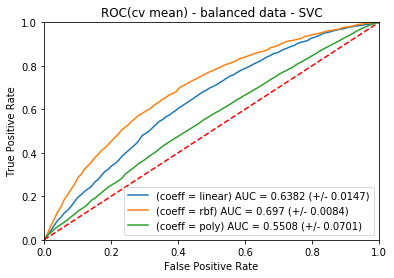

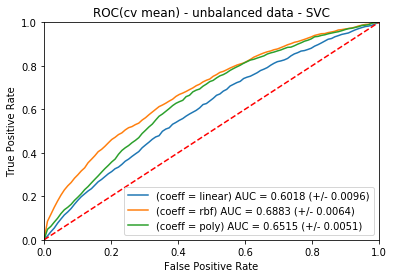

SVC - Perfomance


accuracy  specificity  f1 score       auc   auc_std
coeff_value balanced                                                     
linear      False     0.902300     0.999816  0.000442  0.601818  0.009561
            True      0.581444     0.576681  0.122083  0.638175  0.014673
poly        False     0.901305     0.996630  0.003870  0.651547  0.005118
            True      0.320747     0.258257  0.175385  0.550756  0.070117
rbf         False     0.902411     0.999939  0.000442  0.688331  0.006414
            True      0.624075     0.618958  0.131041  0.697006  0.008353

In [31]:
#Evaluate perfomance
plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_mean_perf = cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()
cv_mean  = cv_mean_perf.join(roc_mean_perf.loc[classifier_name][["auc","auc_std"]])
cv_mean.drop(columns = ['precision', 'recall'])

## Running final evaluation
### Get best parameters from cross validation

In [32]:
cv_mean_perf = cv_perf.groupby(['classifier_name','coeff_value','balanced']).mean()
cv_mean  = cv_mean_perf.join(roc_mean_perf[["auc","auc_std"]])
#cv_mean.drop(columns = ['precision', 'recall'])
cv_mean["auc"].groupby(["classifier_name"]).apply(np.argmax)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


classifier_name
DecisionTreeClassifier              (DecisionTreeClassifier, 5, False)
GradientBoostingClassifier    (GradientBoostingClassifier, 100, False)
KNeighborsClassifier                  (KNeighborsClassifier, 5, False)
RandomForestClassifier             (RandomForestClassifier, 100, True)
SVC                                                   (SVC, rbf, True)
Name: auc, dtype: object

### Undersampling whole data_train set
So far, we only used the balanced data in cross validation

In [33]:
#Creating balanced set for whole training dataset
rus = RandomUnderSampler(random_state=420,sampling_strategy = 1)
data_train_balanced, target_train_balanced = rus.fit_resample(data_train, target_train)

### Run_Classifier_Validation
Running classifiers for validation and storing the scores

In [34]:
#Create perfomance Dataframes
cv_perf_validation = pd.DataFrame(columns = ['accuracy', 'recall', 'specificity', 'precision', 'f1 score']
                  , index = pd.MultiIndex.from_arrays([[],[]], names =['classifier_name','balanced']))
roc_perf_validation = pd.DataFrame(columns = ['tpr', 'auc']
                  , index = pd.MultiIndex.from_arrays([[],[]], names =['classifier_name','balanced']))





#Assign fpr value for tpr interpolation in ROC calculation
mean_fpr = np.linspace(0, 1, 100) # = [0.0, 0.01, 0.02, 0.03, ... , 0.99, 1.0]



#Define function that runs crossvalidation for balanced and inbalanced data
def run_classifier_validation(classifier, classifier_name, balanced):
    
    print("starting to run Classifier " + classifier_name + " for balanced=" + str(balanced) + " at " + str(datetime.now(tz=None)))

    if(balanced):
        classifier.fit(data_train_balanced, target_train_balanced)
    else:
        classifier.fit(data_train, target_train)

    #performance
    predictions = classifier.predict(data_validation)
    acc, sens, spec, prec, f1 = performance(target_validation, predictions)
    cv_perf_validation.loc[(classifier_name,balanced), ['accuracy','recall','specificity','precision','f1 score']] = [acc,sens,spec,prec,f1]

    #ROC
    predictions_probas = classifier.predict_proba(data_validation)
    fpr, tpr, thresholds = roc_curve(target_validation, predictions_probas[:,1])
    tprs = np.interp(mean_fpr, fpr, tpr)
    tprs[0] = 0.0 
    roc_perf_validation.loc[(classifier_name,balanced),['tpr','auc']] = [tprs,auc(fpr, tpr)]

    print("finished to run Classifier " + classifier_name + " for balanced=" + str(balanced) + " at " + str(datetime.now(tz=None)))

### Run all the classifiers
Running classifiers with best scores for balanced and unbalanced data

In [35]:
#Define winning classifiers
coefficients = [5, 100, 5, 100, "rbf"]

from sklearn.neighbors import KNeighborsClassifier
classifier_0_balanced = KNeighborsClassifier(n_neighbors=coefficients[0], n_jobs = 2)
classifier_0_unbalanced = KNeighborsClassifier(n_neighbors=coefficients[0], n_jobs = 2)
run_classifier_validation(classifier_0_balanced, "KNeighbors", True)
run_classifier_validation(classifier_0_unbalanced, "KNeighbors", False)

from sklearn.tree import DecisionTreeClassifier
classifier_1_balanced = DecisionTreeClassifier(max_depth = coefficients[1], random_state = 420)
classifier_1_unbalanced = DecisionTreeClassifier(max_depth = coefficients[1], random_state = 420)
run_classifier_validation(classifier_1_balanced, "DecisionTree", True)
run_classifier_validation(classifier_1_unbalanced, "DecisionTree", False)

from sklearn.ensemble import RandomForestClassifier
classifier_2_balanced = RandomForestClassifier(n_estimators = coefficients[2], max_depth = 5, random_state = 420)
classifier_2_unbalanced = RandomForestClassifier(n_estimators = coefficients[2], max_depth = 5, random_state = 420)
run_classifier_validation(classifier_2_balanced, "RandomForest", True)
run_classifier_validation(classifier_2_unbalanced, "RandomForest", False)

from sklearn.ensemble import GradientBoostingClassifier
classifier_3_balanced = GradientBoostingClassifier(n_estimators = coefficients[3], max_depth = 5, learning_rate = 0.1, random_state = 420)
classifier_3_unbalanced = GradientBoostingClassifier(n_estimators = coefficients[3], max_depth = 5, learning_rate = 0.1, random_state = 420)
run_classifier_validation(classifier_3_balanced, "GradientBoosting", True)
run_classifier_validation(classifier_3_unbalanced, "GradientBoosting", False)

from sklearn.svm import SVC
classifier_4_balanced = SVC(kernel = coefficients[4], C = 1, probability = True, gamma = 'auto', random_state = 420, cache_size=1999)
classifier_4_unbalanced = SVC(kernel = coefficients[4], C = 1, probability = True, gamma = 'auto', random_state = 420, cache_size=1999)
run_classifier_validation(classifier_4_balanced, "SVC", True)
run_classifier_validation(classifier_4_unbalanced, "SVC", False)

starting to run Classifier KNeighbors for balanced=True at 2019-11-25 14:18:41.789687
finished to run Classifier KNeighbors for balanced=True at 2019-11-25 14:18:58.234710
starting to run Classifier KNeighbors for balanced=False at 2019-11-25 14:18:58.235707
finished to run Classifier KNeighbors for balanced=False at 2019-11-25 14:20:32.089158
starting to run Classifier DecisionTree for balanced=True at 2019-11-25 14:20:32.090156
finished to run Classifier DecisionTree for balanced=True at 2019-11-25 14:20:33.669460
starting to run Classifier DecisionTree for balanced=False at 2019-11-25 14:20:33.669460
finished to run Classifier DecisionTree for balanced=False at 2019-11-25 14:20:51.270361
starting to run Classifier RandomForest for balanced=True at 2019-11-25 14:20:51.271358
finished to run Classifier RandomForest for balanced=True at 2019-11-25 14:20:51.408990
starting to run Classifier RandomForest for balanced=False at 2019-11-25 14:20:51.409988


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run Classifier RandomForest for balanced=False at 2019-11-25 14:20:51.969491
starting to run Classifier GradientBoosting for balanced=True at 2019-11-25 14:20:51.970488
finished to run Classifier GradientBoosting for balanced=True at 2019-11-25 14:21:17.363539
starting to run Classifier GradientBoosting for balanced=False at 2019-11-25 14:21:17.364536
finished to run Classifier GradientBoosting for balanced=False at 2019-11-25 14:23:17.110431
starting to run Classifier SVC for balanced=True at 2019-11-25 14:23:17.111428
finished to run Classifier SVC for balanced=True at 2019-11-25 14:24:08.868689
starting to run Classifier SVC for balanced=False at 2019-11-25 14:24:08.869687


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run Classifier SVC for balanced=False at 2019-11-25 14:34:25.920488


### Plot_ROC_Validation
Plot ROC for the validation classifiers and storing AUC.

In [36]:
roc_mean_perf_validation = pd.DataFrame(columns = ['tpr', 'auc', "auc_std"]
                  , index = pd.MultiIndex.from_arrays([[],[]], names =['classifier_name','balanced']))

#function to plot crossvalidated ROC
def plot_roc_validation():
    plt.rcParams.update({'font.size': 18})
    for balanced in (True,False):
        if(balanced):
            plt.title('ROC - balanced data')
        else:
            plt.title('ROC - unbalanced data')
        for c in cv_perf_validation.xs(True, level=1).index.to_list():
            mean_tpr = roc_perf_validation.loc[(c,balanced),["tpr"]].values.mean()
            mean_tpr[-1] = 1.0 # set the last tpr to 1
            mean_auc = auc(mean_fpr, mean_tpr)
            std_auc = roc_perf_validation.loc[idx[c,balanced,:],"auc"].values.std()
            
            roc_mean_perf_validation.loc[(c,balanced), ['tpr', 'auc', 'auc_std']] = [mean_tpr,mean_auc,std_auc]
            plt.plot(mean_fpr, mean_tpr, label = ''+str(c)+' AUC = '+str(round(mean_auc,4)))
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18))

        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

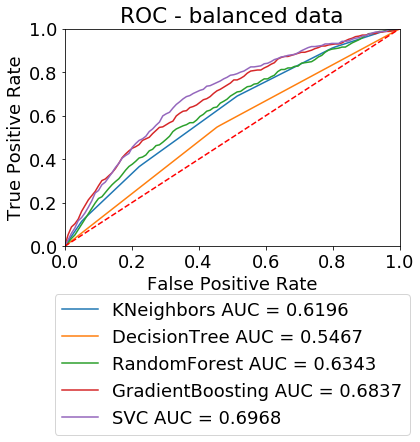

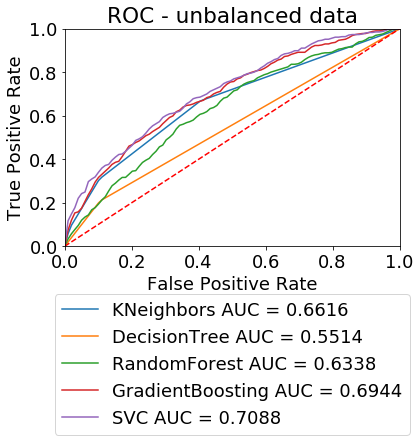

In [37]:
plot_roc_validation()

### Show Scores for validation classifiers

In [38]:
# Apply to numeric to ensure that calculations are working
cv_perf_validation = cv_perf_validation.apply(pd.to_numeric)

((cv_perf_validation.groupby(['classifier_name','balanced']).mean()).join(roc_mean_perf_validation[["auc","auc_std"]])).drop(columns = ['accuracy', 'specificity'])

recall  precision  f1 score       auc  auc_std
classifier_name  balanced                                                  
KNeighbors       True      0.690647   0.070158  0.127377  0.619598      0.0
                 False     0.088729   0.009013  0.016364  0.661644      0.0
DecisionTree     True      0.549161   0.055786  0.101283  0.546685      0.0
                 False     0.208633   0.021194  0.038479   0.55144      0.0
RandomForest     True      0.659472   0.066991  0.121628  0.634326      0.0
                 False     0.000000   0.000000       NaN  0.633835      0.0
GradientBoosting True      0.621103   0.063094  0.114551  0.683732      0.0
                 False     0.011990   0.001218  0.002211  0.694438      0.0
SVC              True      0.695444   0.070646  0.128262  0.696829      0.0
                 False     0.000000   0.000000       NaN  0.708778      0.0

### Show Feature Importances
Only for Gradient Boosting Classifier

In [39]:
test = pd.DataFrame(classifier_3_balanced.feature_importances_, columns=["attributes"])
test.index = data_train.columns
test.sort_values(by=["attributes"], ascending=False).head(10)

attributes
feature            statistics number            
zcr                std        01        0.023988
spectral_bandwidth max        01        0.014680
spectral_centroid  std        01        0.012673
mfcc               min        06        0.011821
                   median     18        0.011299
chroma_cqt         min        11        0.010680
mfcc               min        08        0.008323
spectral_contrast  skew       06        0.007920
                   std        01        0.007830
spectral_centroid  max        01        0.006909

# Code not used for final result

In [ ]:
# old train test split
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    sound_features_scaled, popularities, test_size=0.2, random_state=42, stratify=None)

In [ ]:
# Regression algorithms, showed very poor results
from sklearn.linear_model import LinearRegression

regressionmodel = LinearRegression()
regressionmodel.fit(data_train, target_train)
print(regressionmodel.score(data_train, target_train))
print(regressionmodel.coef_)
predictions = regressionmodel.predict(data_test)

In [ ]:
# Regression algorithms, showed very poor results
from sklearn.svm import SVR

regressionmodel = SVR()
regressionmodel.fit(data_train, target_train)
print(regressionmodel.score(data_train, target_train))
predictions = regressionmodel.predict(data_test)

In [ ]:
# Regression algorithms, showed very poor results
from sklearn.linear_model import SGDRegressor

regressionmodel = SGDRegressor(max_iter=10000)
regressionmodel.fit(data_train, target_train)
print(regressionmodel.score(data_train, target_train))
predictions = regressionmodel.predict(data_test)

In [ ]:
# Evaluate regression prediction results
print(target_test)
print(np.mean(predictions), np.max(predictions), np.min(predictions))

In [ ]:
# Limiting outliers from regression predictions
predictions[predictions < 0] = 0
predictions[predictions > 100] = 100

In [ ]:
# Calculate metrics for regression
from sklearn.metrics import explained_variance_score, mean_squared_error
print(explained_variance_score(predictions, target_test))
print(mean_squared_error(predictions, target_test))

In [ ]:
#scatter matrix mean top 100
ax = scatter_matrix(chroma_sftf_short.loc[:,"mean_C":"mean_B"].astype(np.float), figsize = (20,20), marker = '+')
plt.setp(ax, xlim = (0,1))
plt.show()

#scatter matrix min top 100
ax = scatter_matrix(chroma_sftf_short.loc[:,"min_C":"min_B"].astype(np.float), figsize = (20,20), marker = '+')
plt.setp(ax, xlim = (-0.5,0.5))
plt.show()

#scatter matrix max top 100
ax = scatter_matrix(chroma_sftf_short.loc[:,"max_C":"max_B"].astype(np.float), figsize = (20,20), marker = '+')
plt.setp(ax, xlim = (0.5,1.5))
plt.show()

In [40]:
# dill is used for dumping and loading current session variables to allow us to restart Jupyter Notebooks.
import dill

In [41]:
dill.dump_session("C:/Data/sessiondump3.session")

In [ ]:
dill.load_session("C:/Data/sessiondump3.session")

In [ ]:
# Get summary table of all validation runs
cv_mean_perf = cv_perf.groupby(['classifier_name','coeff_value','balanced']).mean()
cv_mean  = cv_mean_perf.join(roc_mean_perf[["auc","auc_std"]])
cv_mean.drop(columns = ['precision', 'recall'])

In [ ]:
# Getting class distribution
target_train.value_counts()